In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.express as px
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url, delimiter=',')
df.head(5)

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24651 entries, 0 to 24650
Data columns (total 58 columns):
iso_code                               21489 non-null object
country                                24651 non-null object
year                                   24651 non-null int64
co2                                    23403 non-null float64
consumption_co2                        3815 non-null float64
co2_growth_prct                        24383 non-null float64
co2_growth_abs                         23042 non-null float64
trade_co2                              3815 non-null float64
co2_per_capita                         22735 non-null float64
consumption_co2_per_capita             3815 non-null float64
share_global_co2                       23403 non-null float64
cumulative_co2                         23403 non-null float64
share_global_cumulative_co2            23403 non-null float64
co2_per_gdp                            15386 non-null float64
consumption_co2_per_gdp       

In [4]:
df_average_co2 = df[['iso_code', 'country', 'co2']]
df_average_co2 = df_average_co2.groupby(["country"], as_index=False).mean()
df_average_co2.head()

,country,co2
0,Afghanistan,2.554606
1,Africa,340.077331
2,Albania,3.247080
3,Algeria,42.745067
4,Andorra,0.484767


In [5]:
# Average annual production-based emissions of carbon dioxide (CO2)

fig = px.choropleth(df_average_co2, locations="country", locationmode="country names", color="co2", 
hover_name='country',color_continuous_scale=px.colors.sequential.Turbo, scope="world")
  
fig.show()

In [6]:
df_countries = df[['year', 'country', 'co2']]
df_countries.head()

,year,country,co2
0,1949,Afghanistan,0.015
1,1950,Afghanistan,0.084
2,1951,Afghanistan,0.092
3,1952,Afghanistan,0.092
4,1953,Afghanistan,0.106


In [7]:
len(df_countries[df_countries.co2.isnull()])

1248

In [8]:
df_united_states = df_countries[df_countries.country == 'United States']
df_united_states.head()

,year,country,co2
23305,1800,United States,0.253
23306,1801,United States,0.267
23307,1802,United States,0.289
23308,1803,United States,0.297
23309,1804,United States,0.333


In [9]:
df_united_states = df_united_states.drop('country',axis=1)
df_united_states.index = pd.to_datetime(df_united_states.year, format= '%Y')
df_united_states

,year,co2
year,,
1800-01-01,1800,0.253
1801-01-01,1801,0.267
1802-01-01,1802,0.289
1803-01-01,1803,0.297
1804-01-01,1804,0.333
...,...,...
2015-01-01,2015,5412.432
2016-01-01,2016,5292.268
2017-01-01,2017,5253.606


In [10]:
df_united_states = df_united_states.drop('year',axis=1)

In [11]:
df_united_states['Ticks'] = range(0,len(df_united_states.index.values))
df_united_states.head()

,co2,Ticks
year,,
1800-01-01,0.253,0
1801-01-01,0.267,1
1802-01-01,0.289,2
1803-01-01,0.297,3
1804-01-01,0.333,4


In [12]:
df_united_states.tail()

,co2,Ticks
year,,
2015-01-01,5412.432,215
2016-01-01,5292.268,216
2017-01-01,5253.606,217
2018-01-01,5424.882,218
2019-01-01,5284.697,219


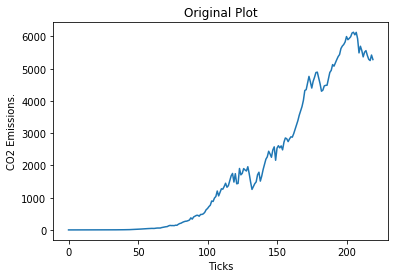

In [13]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('CO2 Emissions.')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'co2', data = df_united_states);

In [14]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(center=False,window=12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

C:\Users\ajord\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



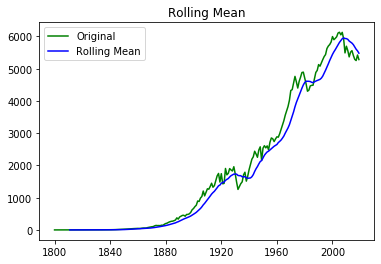

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (0.49832306672881477, 0.9848220380510823, 12, 207, {'1%': -3.4623415245233145, '5%': -2.875606128263243, '10%': -2.574267439846904}, 2517.7552482211004)
df_output: 
 Test Statistic                   0.498323
p-value                          0.984822
#Lags Used                      12.000000
Number of Observations Used    207.000000
dtype: float64
Test Statistic                   0.498323
p-value                          0.984822
#Lags Used                      12.000000
Number of Observations Used    207.000000
Critical Value (1%)             -3.462342
Critical Value (5%)             -2.875606
Critical Value (10%)            -2.574267
dtype: float64


In [15]:
stationarity_check(df_united_states.co2)

In [16]:
# Comparing the test statistic to the critical values, it looks like we would have to fail to reject 
# the null hypothesis that the time series is non-stationary and does have time-dependent structure.

In [17]:
# Transforming non-stationary data using differencing

df_united_states["diff_1"] = df_united_states["co2"].diff(periods=1)
df_united_states["diff_2"] = df_united_states["co2"].diff(periods=2)
df_united_states["diff_3"] = df_united_states["co2"].diff(periods=3)

df_united_states.head(6)

,co2,Ticks,diff_1,diff_2,diff_3
year,,,,,
1800-01-01,0.253,0,NaN,NaN,NaN
1801-01-01,0.267,1,0.014,NaN,NaN
1802-01-01,0.289,2,0.022,0.036,NaN
1803-01-01,0.297,3,0.008,0.030,0.044
1804-01-01,0.333,4,0.036,0.044,0.066
1805-01-01,0.341,5,0.008,0.044,0.052


In [24]:
# After differencing, the p-value is < 0.05. Now safe to reject null hypothesis and conclude
# that the data is stationary

df_test = adfuller(df_united_states["diff_2"].dropna())
df_test[1]


0.00029046076877827073

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



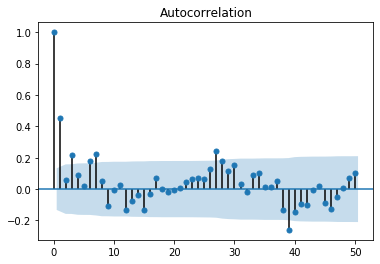

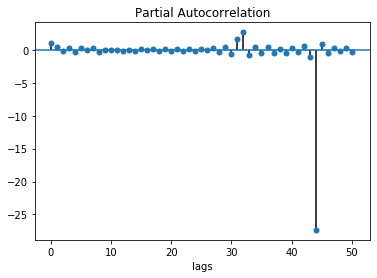

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(df_united_states["diff_2"].dropna(), lags=50)
plot_pacf(df_united_states["diff_2"].dropna(), lags=50)
plt.xlabel('lags')
plt.show()

In [26]:
from statsmodels.tsa.arima_model import ARMA

import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(df_united_states["diff_2"].dropna(),order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



ARMA(0, 0) - AIC:2845.3193594565537
ARMA(0, 1) - AIC:2704.6906693252868
ARMA(0, 2) - AIC:2706.6435613291774
ARMA(1, 0) - AIC:2796.709839958531


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



ARMA(1, 1) - AIC:2706.656076941381


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



ARMA(1, 2) - AIC:2709.401018725798
ARMA(2, 0) - AIC:2790.799630814277


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



ARMA(2, 1) - AIC:2707.3471398561915


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



ARMA(3, 0) - AIC:2762.1825376691263


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



ARMA(3, 1) - AIC:2691.1020783759204


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



ARMA(3, 2) - AIC:2692.1242167634878


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



ARMA(3, 3) - AIC:2692.702143809253


C:\Users\ajord\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



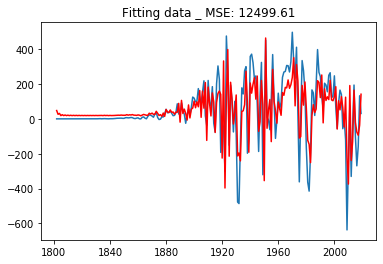

In [27]:
model = ARMA(df_united_states["diff_2"].dropna(), order=(3,1))  
results_MA = model.fit()  
plt.plot(df_united_states["diff_2"].dropna())
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_united_states["diff_2"].dropna())**2).mean()))
plt.show()

In [28]:
predictions = results_MA.predict(end = "01/01/2022" )
predictions

1802-01-01     47.905033
1803-01-01     26.171166
1804-01-01     31.174851
1805-01-01     18.692242
1806-01-01     24.020119
                 ...    
2018-01-01    -35.770406
2019-01-01    141.441423
2020-01-01   -127.156628
2021-01-01     70.222425
2022-01-01     58.360017
Freq: AS-JAN, Length: 221, dtype: float64